In [10]:
import pandas as pd
df = pd.read_csv("C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\Basic stats - 1\\sales_data_with_discounts.csv")
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [11]:
# Get numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['number']).columns.tolist() 
# Calculation of the mean, median, mode, and standard deviation for each numerical column
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]  # Mode can return multiple values, we take the first one
    std = df[col].std()

    print(f"Statistics for column '{col}':")
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Mode: {mode}")
    print(f"  Standard Deviation: {std}")

    # Basic Interpretation
    if mean > median:
        print(f"  Data in '{col}' is likely right-skewed (tail on the right)")
    elif mean < median:
        print(f"  Data in '{col}' is likely left-skewed (tail on the left)")
    else:
        print(f"  Data in '{col}' is likely approximately symmetrical")

Statistics for column 'Volume':
  Mean: 5.066666666666666
  Median: 4.0
  Mode: 3
  Standard Deviation: 4.231602391213926
  Data in 'Volume' is likely right-skewed (tail on the right)
Statistics for column 'Avg Price':
  Mean: 10453.433333333332
  Median: 1450.0
  Mode: 400
  Standard Deviation: 18079.90483993645
  Data in 'Avg Price' is likely right-skewed (tail on the right)
Statistics for column 'Total Sales Value':
  Mean: 33812.83555555555
  Median: 5700.0
  Mode: 24300
  Standard Deviation: 50535.07417255328
  Data in 'Total Sales Value' is likely right-skewed (tail on the right)
Statistics for column 'Discount Rate (%)':
  Mean: 15.15524189533091
  Median: 16.57776564929597
  Mode: 5.007822189204133
  Standard Deviation: 4.220602153325511
  Data in 'Discount Rate (%)' is likely left-skewed (tail on the left)
Statistics for column 'Discount Amount':
  Mean: 3346.499424342415
  Median: 988.9337332382784
  Mode: 69.17794228822787
  Standard Deviation: 4509.9029633539985
  Data in '

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

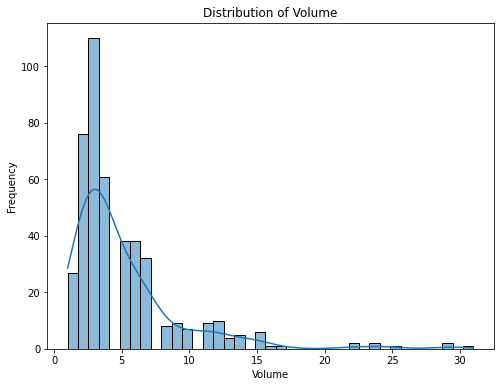

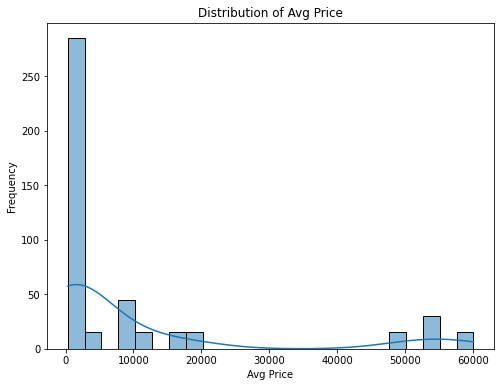

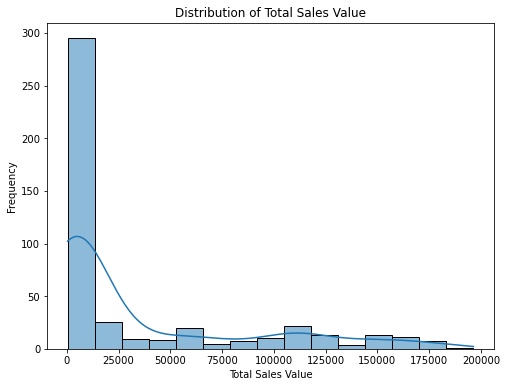

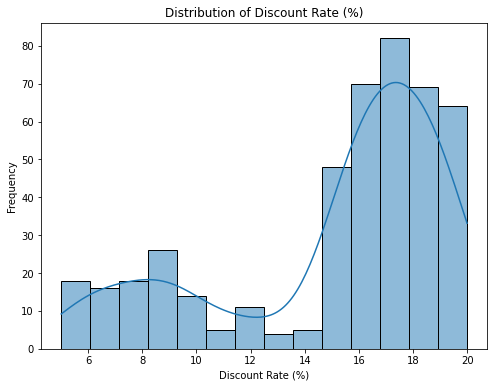

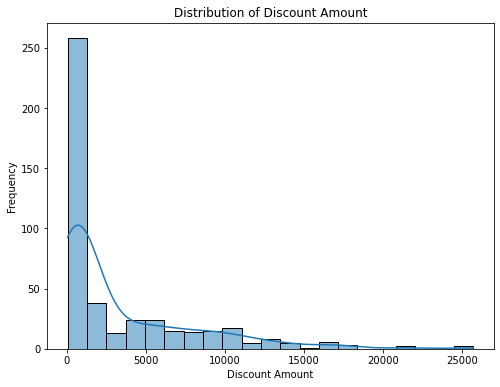

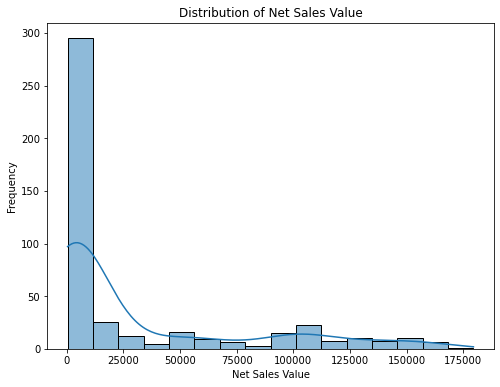

In [13]:
# Assuming 'numerical_cols' is a list of your numerical columns

#histogram

for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(df[col], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

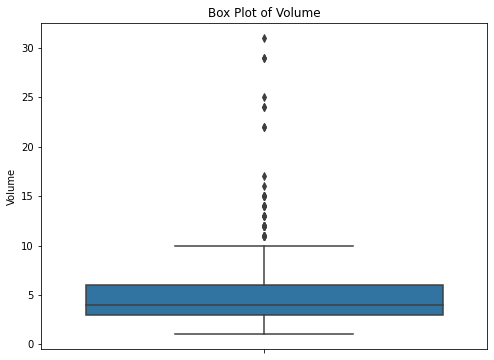

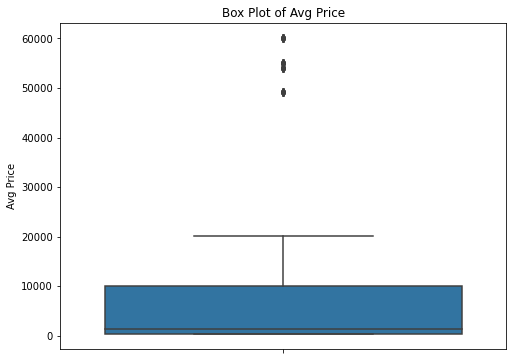

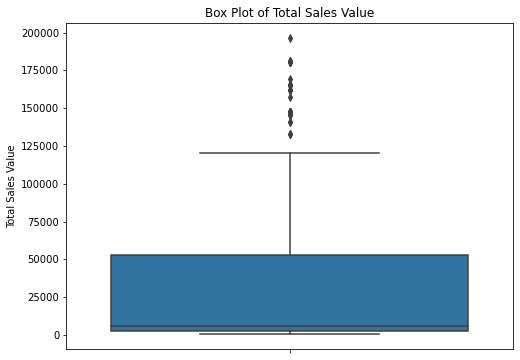

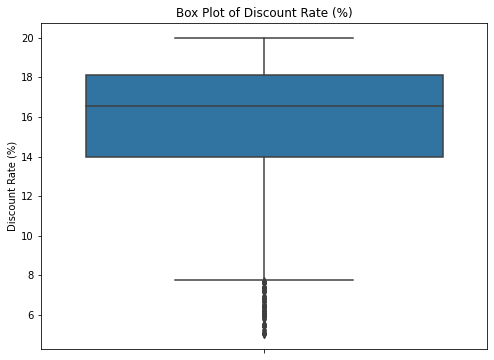

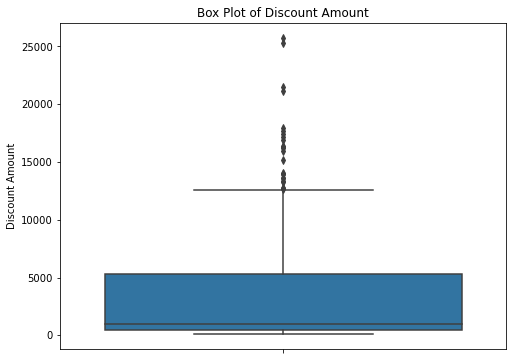

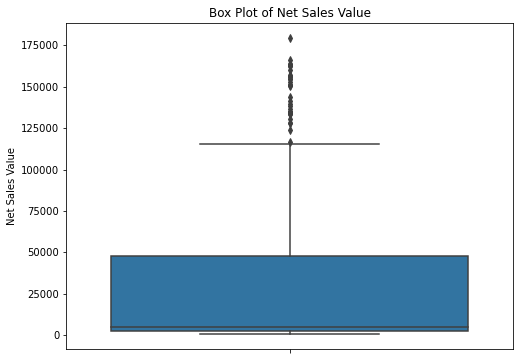

In [14]:
#box plot

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])  # Creating the boxplot
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


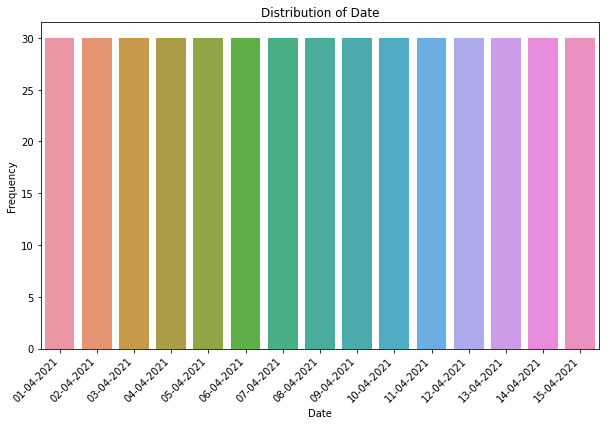

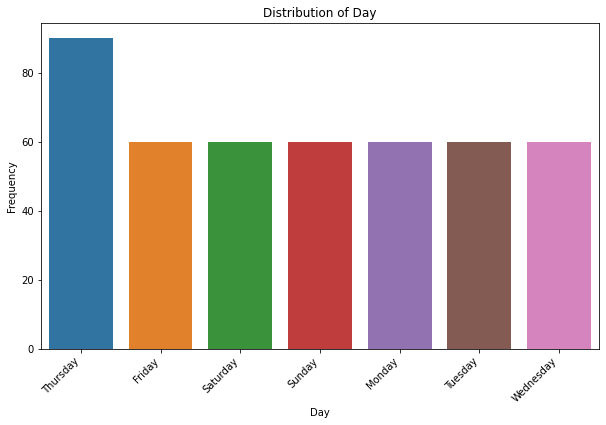

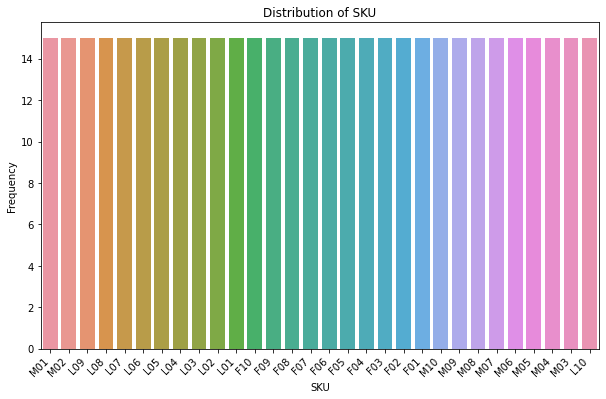

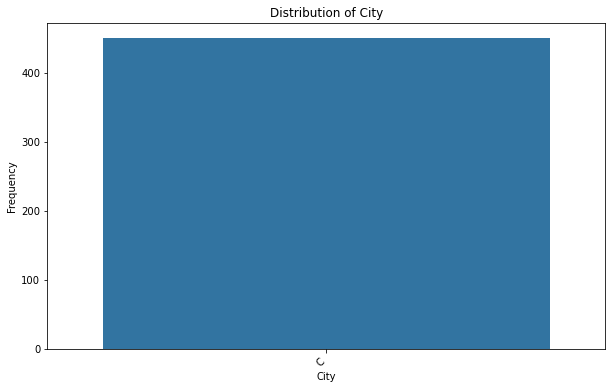

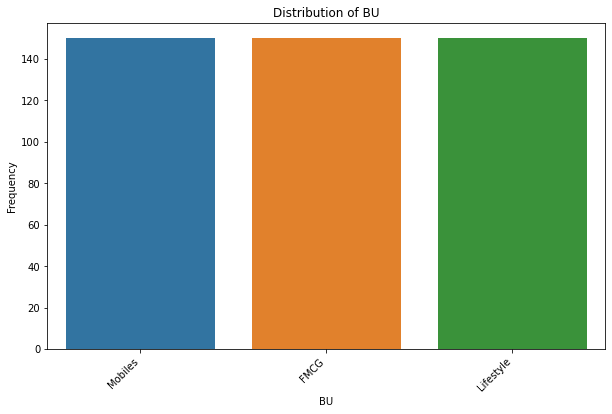

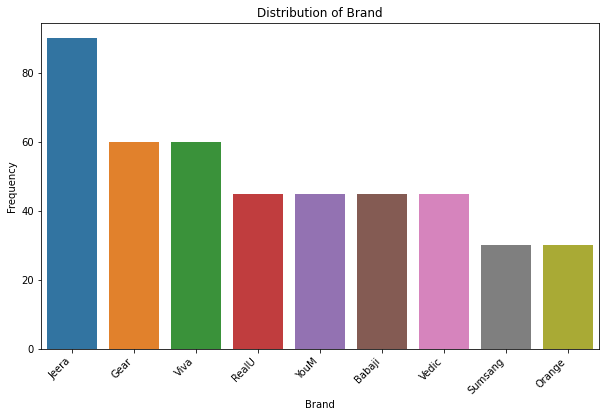

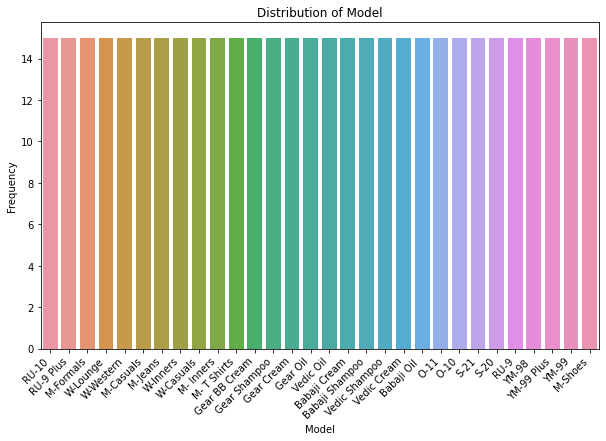

In [16]:
#barchart

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

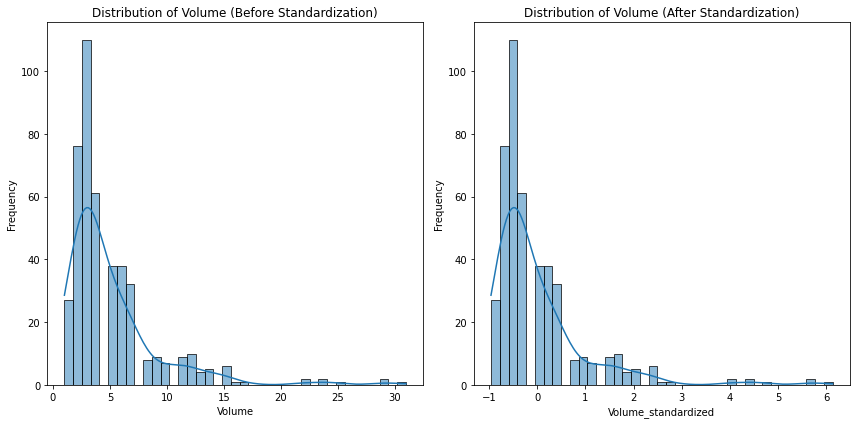

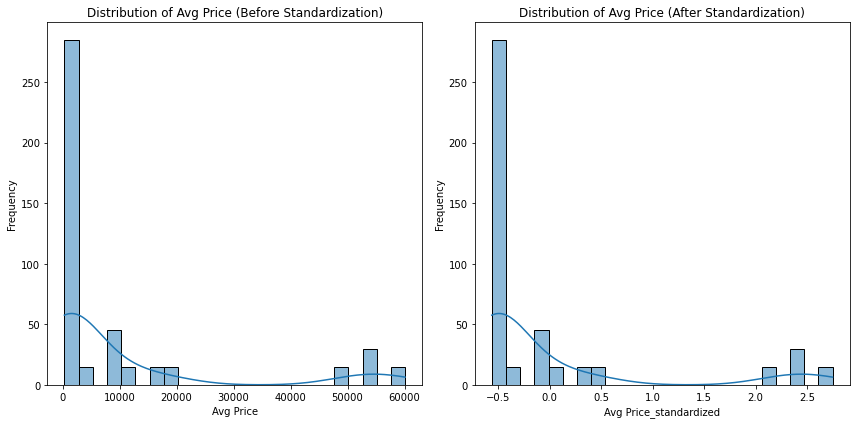

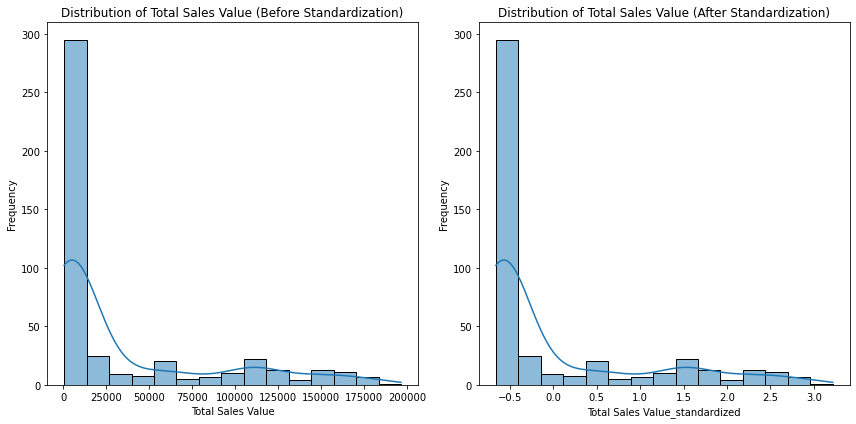

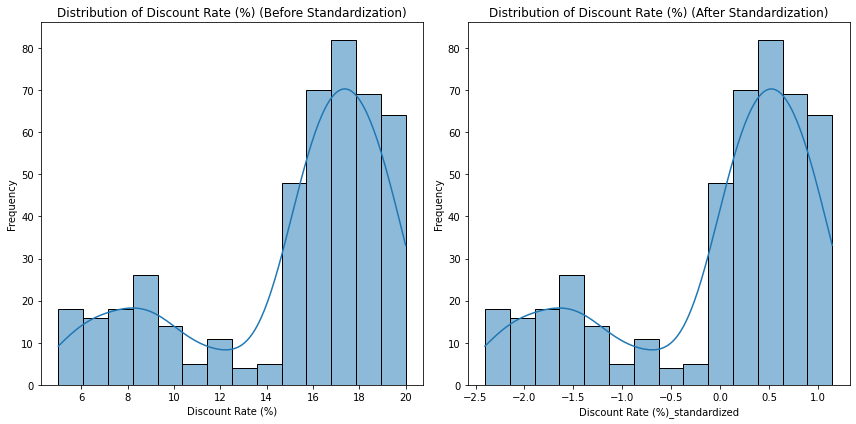

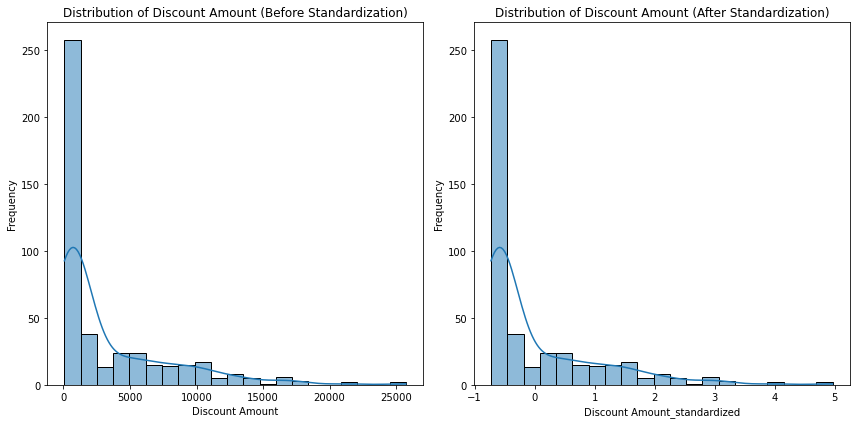

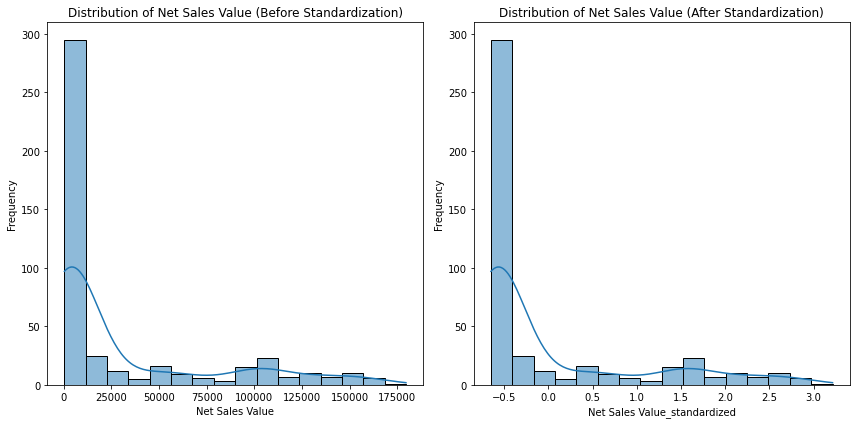

In [17]:

# Assuming 'numerical_cols' is a list of your numerical columns
for col in numerical_cols:
    # Calculate mean (mu) and standard deviation (sigma)
    mu = df[col].mean()
    sigma = df[col].std()

    # Standardize the column
    df[col + '_standardized'] = (df[col] - mu) / sigma

    # Before and After Comparison Plots
    plt.figure(figsize=(12, 6))

    # Before Standardization
    plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, first plot)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} (Before Standardization)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # After Standardization
    plt.subplot(1, 2, 2)  # Create the second subplot
    sns.histplot(df[col + '_standardized'], kde=True)
    plt.title(f"Distribution of {col} (After Standardization)")
    plt.xlabel(col + '_standardized')
    plt.ylabel("Frequency")

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

In [18]:

# Assuming 'categorical_cols' is a list of your categorical columns
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype=int)

# Display a portion of the transformed dataset
print(encoded_df.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0    160346.501180             2.347417                0.091072   
1     89323.897039             1.165831               -0.019548   
2    102042.089843             0.456880                0.312312   
3    112235.925298             0.220563                0.533552   
4     19927.053770            -0.488389               -0.130168   

   Total Sales Value_standardized  Discount Rate (%)_standardized  ...  \
0                        2.922469               